# Difference in English 12 averages for public vs. private school students
### STAT 201 Group 16 - Karina Grewal, Michelle Kim, Alex Lee, Janine Xu

## Introduction

Inequality of quality of education and achievement imbalance in public and private/independent schools students was seen in many different countries including the USA<sup>2</sup>, Mexico<sup>3</sup>, and China<sup>4</sup>. Canada spends more than 5% of the federal budget on public education, recording one of the highest in the world<sup>5</sup>. Private schools, in general, are thought to provide a better education than public schools. Due to the high tuition cost, independent schools may have better resources and more qualified teachers. Public schools may have larger class sizes, so students may have less support in their learning. So, we became curious if we can observe a similar phenomenon in Canada, particularly BC, where the students from independent schools showcase higher academic achievement than in public schools. 

**Question**: Are English 12 marks higher in independent schools in BC compared to public schools?

**Random variable**: average mark per school (%)

**Categorical variables**: BC public school vs independent school

**Location parameter**: difference in mean (if average marks are higher in private vs public schools)

**Scale parameter**: standard deviation (can be used to find confidence interval and shows the spread of the data)

Our dataset is from the BC Ministry of Education<sup>1</sup> and shows examination results from 2016-2020. The dataset contains several important columns for our analysis:
- PUBLIC_OR_INDEPENDENT (type of school, independent/public)
- EXAM_SUBJECT (includes 4 language course types, such as English 12)
- MARK_TYPE (type of mark given, e.g. final marks or exam marks)
- AVERAGE_PERCENT (the average percentage in a school)

We decided to look at final marks, which are the final marks for each course blending exam results and course results, to get the full picture of student scores. The only course types available were language courses, so we also focused on English 12 because it was the most commonly taken compulsory grade 12 course in BC, compared with other courses, such as Français 12, which is only offered in French Immersion schools.


## Methods and Results

In [1]:
# import necessary libraries and packages
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.8      ✔ rsample   0.0.7 
✔ infer     0.5.3      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.1.3 
✔ parsnip   0.1.3    

First, we loaded our data directly from the web (Github). The data is an official government-released source for grades of grade 12 students studied in BC from 2016 to 2020. Therefore, it will be appropriate to generalize our findings to all grade 12 students in BC high schools. 

Since we are planning to perform a hypothesis test, we did a quick check on the data size based on school type to ensure that we have enough data points to work with. 

As a part of wrangling and cleaning the data, we selected only the variables of interest (PUBLIC_OR_INDEPENDENT, AVERAGE_PERCENT, MARK_TYPE, EXAM_SUBJECT), then filtered to narrow down the range of the data to the final marks in English 12.

We didn't scale or centre the data since the original data was already scaled and centred to be out of 100 by the institution. We can consider the difficulties of exams to get rid of any biases, but that is out of the scope of this investigation.

In [2]:
# read data from the web
exam_data <- read_delim("https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv", delim = ",")

# check if data size is sufficient
exam_test<-exam_data %>% 
    select(PUBLIC_OR_INDEPENDENT) %>% 
    group_by(PUBLIC_OR_INDEPENDENT) %>% 
    summarize(n=n())

exam_test

# clean and wrangle data into tidy format
exam_school_type <- exam_data  %>% 
                    select(PUBLIC_OR_INDEPENDENT, AVERAGE_PERCENT, MARK_TYPE, EXAM_SUBJECT) %>% 
                    filter(AVERAGE_PERCENT != "Msk") %>% 
                    filter(PUBLIC_OR_INDEPENDENT == "BC Public School" |PUBLIC_OR_INDEPENDENT == "BC Independent School") %>%
                    filter(EXAM_SUBJECT == "ENGLISH 12" & MARK_TYPE == "Final Marks" ) %>% 
                    mutate(AVERAGE_PERCENT = as.numeric(AVERAGE_PERCENT))
head(exam_school_type)

Parsed with column specification:
cols(
  .default = col_character(),
  SCHOOL_NUMBER = col_logical(),
  SCHOOL_NAME = col_logical(),
  GRADE = col_double()
)

See spec(...) for full column specifications.

Warning message:
“81714 parsing failures.
 row           col           expected                actual                                                                                                                                     file
2314 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv'
2314 SCHOOL_NAME   1/0/T/F/TRUE/FALSE Mount Baker Secondary 'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv'
2315 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-exam

PUBLIC_OR_INDEPENDENT,n
<chr>,<int>
BC Independent School,7377
BC Public School,41316
Province-Total,225


PUBLIC_OR_INDEPENDENT,AVERAGE_PERCENT,MARK_TYPE,EXAM_SUBJECT
<chr>,<dbl>,<chr>,<chr>
BC Public School,73.2,Final Marks,ENGLISH 12
BC Public School,68.2,Final Marks,ENGLISH 12
BC Public School,73.6,Final Marks,ENGLISH 12
BC Public School,70.6,Final Marks,ENGLISH 12
BC Public School,73.4,Final Marks,ENGLISH 12
BC Independent School,78.2,Final Marks,ENGLISH 12


Our dataset only has data from specific years (2016-2020) and also from specific location (BC). It is insufficient to take such limited and biased data and generalize it over to the entire population of all highschools in Canada, so we took a sample to simulate the situation where we don't have access to the whole dataset.

we took a sample of 40 and 40 because even though we can calculate the population parameter directly we would rarely have the population in our test so we took samples to simulate this

*come back to this later*

In [3]:
#get a sample
set.seed(10)
exam_school_type_sample_public <- exam_school_type %>% 
        filter(PUBLIC_OR_INDEPENDENT == "BC Public School") %>% 
        rep_sample_n(size = 40) 

exam_school_type_sample_Independent <- exam_school_type %>% 
        filter(PUBLIC_OR_INDEPENDENT == "BC Independent School") %>% 
        rep_sample_n(size = 40) 

exam_school_type_sample <- rbind(exam_school_type_sample_public, 
                                 exam_school_type_sample_Independent) %>% 
                        ungroup() %>% 
                        select(-replicate, -MARK_TYPE)
head(exam_school_type_sample)

PUBLIC_OR_INDEPENDENT,AVERAGE_PERCENT,EXAM_SUBJECT
<chr>,<dbl>,<chr>
BC Public School,77.6,ENGLISH 12
BC Public School,70.2,ENGLISH 12
BC Public School,79.8,ENGLISH 12
BC Public School,73.8,ENGLISH 12
BC Public School,77.8,ENGLISH 12
BC Public School,73.2,ENGLISH 12


`summarise()` regrouping output by 'PUBLIC_OR_INDEPENDENT' (override with `.groups` argument)



PUBLIC_OR_INDEPENDENT,EXAM_SUBJECT,mean,sd
<chr>,<chr>,<dbl>,<dbl>
BC Independent School,ENGLISH 12,76.330,8.212224
BC Public School,ENGLISH 12,71.915,4.647003


diff_in_mean
<dbl>
4.415


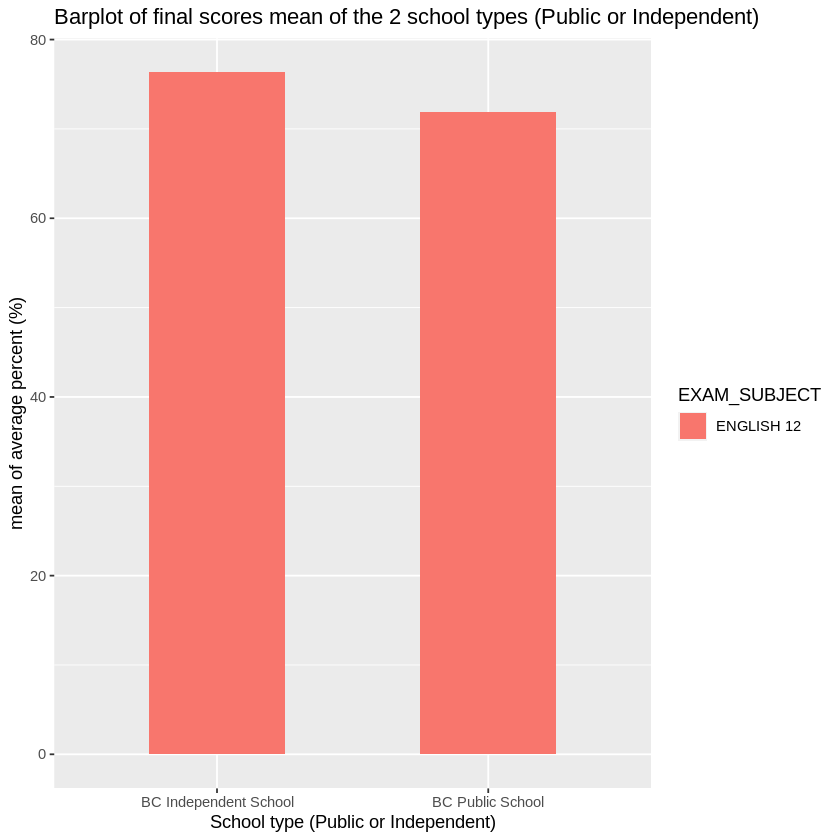

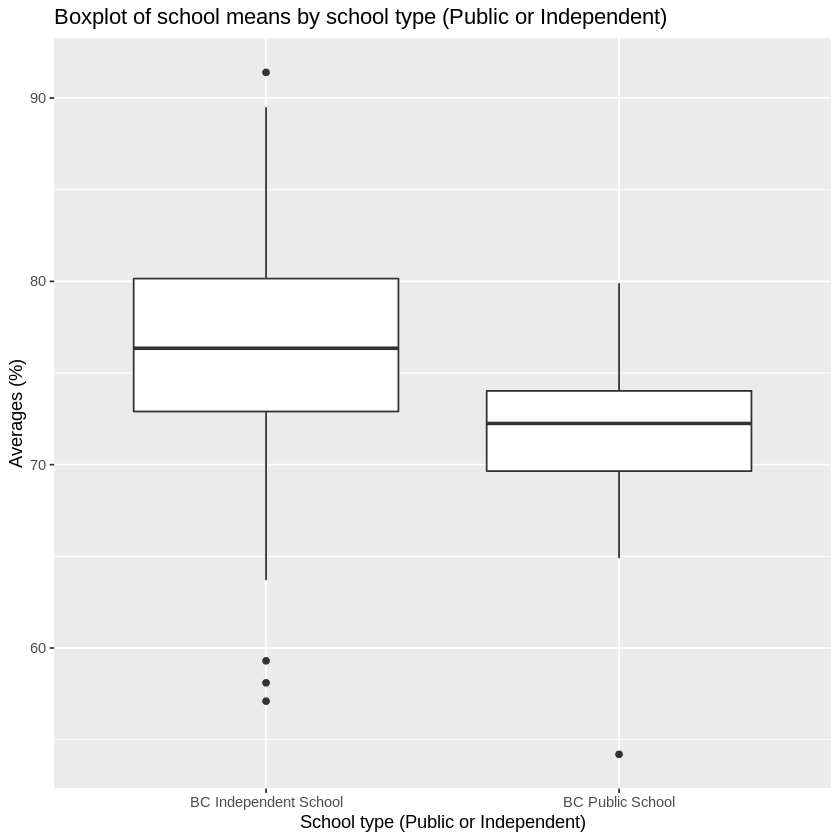

In [4]:
# getting the mean and standard deviation of average percent for each school type 
#   and the diff of their mean (BC Independent School - BC Public School)
data_for_each_catetegory<- exam_school_type_sample %>% 
                group_by(PUBLIC_OR_INDEPENDENT, EXAM_SUBJECT) %>% 
                summarize(mean = mean(AVERAGE_PERCENT),
                          sd = sd(AVERAGE_PERCENT))
data_for_each_catetegory

obs_diff_in_mean <-   exam_school_type_sample  %>% 
    specify(formula = AVERAGE_PERCENT ~ PUBLIC_OR_INDEPENDENT) %>%
    calculate(stat = "diff in means", order = c("BC Independent School", "BC Public School")) %>% 
    mutate(diff_in_mean = stat) %>% 
    select(-stat)
obs_diff_in_mean

# generate bar graph
exam_barplot <- data_for_each_catetegory %>%
    ggplot(aes(x = PUBLIC_OR_INDEPENDENT, y = mean, , fill = EXAM_SUBJECT )) +
    geom_bar(stat="identity", position = "dodge", width = 0.5) +
    xlab("School type (Public or Independent)") +
    ylab("mean of average percent (%)") +
    ggtitle("Barplot of final scores mean of the 2 school types (Public or Independent)") 
exam_barplot

# generate boxplot 
exam_boxplot <- exam_school_type_sample %>%
    ggplot() +
    geom_boxplot(aes(x = PUBLIC_OR_INDEPENDENT, y = AVERAGE_PERCENT)) +
    ggtitle("Boxplot of school means by school type (Public or Independent)") + 
    xlab("School type (Public or Independent)") + 
    ylab("Averages (%)")
exam_boxplot

The preliminary research above suggests that the notable difference between mean averages of private/independent and public schools may be due to the sampling variation. 

By conducting a hypothesis test, we will be able to tell whether our findings are statistically significant. We will conduct a one-sided hypothesis test:

- **Null Hypothesis**- There is no difference in the provicial examination grades in Public or independent highschools in BC 
- **Alternate Hypthesis**- In BC, Independent highschools has higher provicial examination grades than Public highschools.

We will be using bootstrapping to simulate the null distribution and obtain the p-value and the confidence interval. As well, because our dataset does not break the 3 rules needed to perform CLT, we will also be using the CLT/t-test to obtain the p-value and confidence interval. The sample was drawn independently through random sampling on R from the dataset. The size was n=40 for both samples, which is less than 10% of the overall population but is large enough for a good approximation for the CLT. Because we are taking a random sample, we do not have sigma for both populations, so we will be using the t-test to account for the uncertainty from the sample standard deviation. 

We used the functions from the infer package to simulate bootstrap samples. Specify() function sets the explanatory and response variables, generate() function produces 1000 bootstrap functions with the size same as the sample size, and calculate() function computes the difference in means.

In [5]:
#bootrap distribution of 10000 reps using the infer package
set.seed(1)
bootstrap_distribution<- exam_school_type_sample %>% 
        specify(formula = AVERAGE_PERCENT ~PUBLIC_OR_INDEPENDENT ) %>% 
        generate(reps = 10000, type = "bootstrap") %>% 
        calculate(stat = "diff in means", c("BC Independent School", "BC Public School")) 
print('Tibble 6')
head(bootstrap_distribution)

[1] "Tibble 6"


replicate,stat
<int>,<dbl>
1,2.76291640
2,3.78655410
3,6.11867168
4,-0.06967419
5,3.89693558
6,5.04015009


Our confidence intervals will cover the mean grades of each type of school as well as the difference in mean grades. We choose to get a 95% confidence interval since we think it will give a result that well balances precision and accuracy. We do not need to guess the exact value of the population parameter (difference in mean), while we still want to have most of the confidence intervals contain the true population parameter. 

[1] "Tibble 7"


lower_ci,upper_ci
<dbl>,<dbl>
1.458018,7.382629


[1] "Value 1"


[1] 1.487762

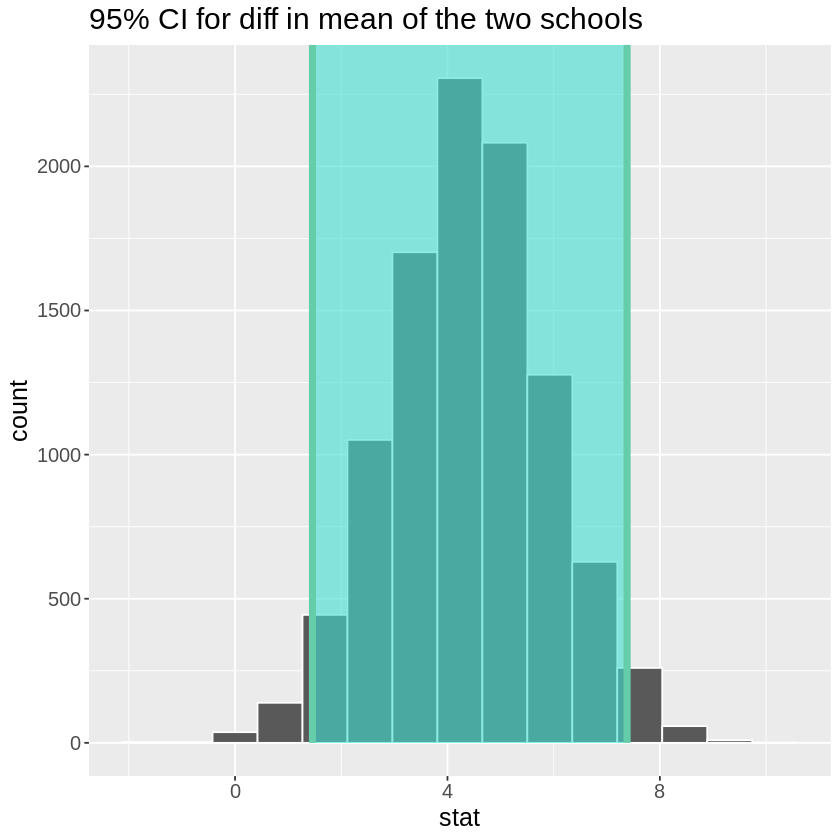

In [6]:
# get 95% confidence interval (bootstrap)
percentile_ci <- bootstrap_distribution %>% 
  get_confidence_interval(level = 0.95, type = "percentile")
print('Tibble 7')
percentile_ci

# visualize the bootstrap distribution
visualize(bootstrap_distribution, binwidth= 0.5) + 
  shade_confidence_interval(endpoints = percentile_ci)+
 theme(text = element_text(size = 15))+
  ggtitle("95% CI for diff in mean of the two schools")

#getting the standard error of bootstrapping method (computer generated simulations)
se_bootstrap<- bootstrap_distribution %>% 
     ungroup() %>%     
    summarize(se = sd(stat)) %>% 
    as.numeric()
print('Value 1')
se_bootstrap

We then declared the null hypothesis using the hypothesize() function of the infer package. Since the null model hypothesizes the independence of two different populations, we passed `null = "independence"` as an argument to the function. After getting the null model, get_p_value() function calculated the  right-tailed p-value.

Also, at this point, we decided to use a significant level of 0.05 since the drawbacks of false positives are quite low considering that we have more students attending public high school than private/independent high school. 

[1] "Tibble 8"


replicate,stat
<int>,<dbl>
1,1.185
2,-0.210
3,-0.970
4,0.230
5,0.850
6,2.510


[1] "Tibble 9"


p_value
<dbl>
0.0015


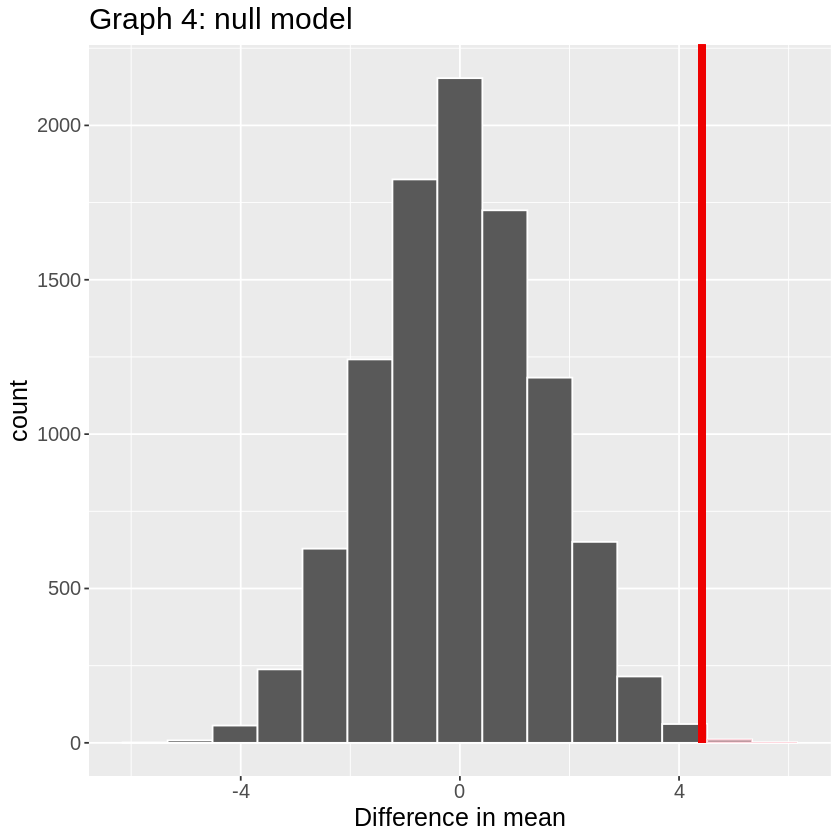

In [7]:
set.seed(1)
#get creating null model 
null_differnece<- exam_school_type_sample %>% 
    specify(formula = AVERAGE_PERCENT ~PUBLIC_OR_INDEPENDENT ) %>% 
    hypothesize(null = "independence") %>%
    generate(reps = 10000, type = "permute") %>% 
    calculate(stat = "diff in means", c("BC Independent School", "BC Public School"))
print('Tibble 8')
head(null_differnece)

#visualize null model with red line being observed difference in mean from our sample
diff_in_mean_plot <-
    visualize(null_differnece, binwidth = 0.5) + 
    shade_p_value(obs_stat = as.numeric(obs_diff_in_mean), direction = "right") +
    xlab("Difference in mean") +
     theme(text = element_text(size = 15))+
    ggtitle("Graph 4: null model")
diff_in_mean_plot

#get p-value
p_value_permute <- null_differnece%>% 
          get_p_value(obs_stat = as.numeric(obs_diff_in_mean), direction = "right")
print('Tibble 9')
p_value_permute

Now, we are using the asymptotics method to compare the means of two independent populations by conducting a two-sample t-test. Functions like qt() and pt() helped to get a quartile and the p-value under the t distribution. 

Test statistic: 
$$
T = \frac{\bar{x}-\bar{y} - d_0}{\sqrt{\frac{s_1^2}{n_1} - \frac{s_2^2}{n_2}} }
$$

Null model: $t$-distribution with approximately $\nu$ degrees of freedom, where 
$$
\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$

In [8]:
#standard error
se<-sqrt(data_for_each_catetegory$sd[1]^2/40 + data_for_each_catetegory$sd[2]^2/40)
print('Value 2')
se
#degree of freedom
v<-(data_for_each_catetegory$sd[1]^2/40 + data_for_each_catetegory$sd[2]^2/40)^2/((data_for_each_catetegory$sd[1]^4/(40^2*(40-1))+(data_for_each_catetegory$sd[2]^4/(40^2*(40-1)))))
print('Value 3')
v

#get confidence interval endpoints of 95% (t-test)
diff_mean_ci_t <- tibble(
    lower_ci = qt(0.025, v) *se+ as.numeric(obs_diff_in_mean),
    upper_ci = qt(0.975,v)*se + as.numeric(obs_diff_in_mean)
)
print('Tibble 10')
diff_mean_ci_t

#t value 
t_value <- (as.numeric(obs_diff_in_mean)- 0)/se
print('Value 4')
t_value

#get p-value using t-test 
v<-(data_for_each_catetegory$sd[1]^2/40 + data_for_each_catetegory$sd[2]^2/40)^2/((data_for_each_catetegory$sd[1]^4/(40^2*(40-1))+(data_for_each_catetegory$sd[2]^4/(40^2*(40-1)))))
p_value <-  pt(t_value, df = v, lower.tail=FALSE)
print('Value 5')
p_value

[1] "Value 2"


[1] 1.491939

[1] "Value 3"


[1] 61.65316

[1] "Tibble 10"


lower_ci,upper_ci
<dbl>,<dbl>
1.432323,7.397677


[1] "Value 4"


[1] 2.959237

[1] "Value 5"


[1] 0.002185338

In [9]:
#p_value using t.test() function
t_test<- t.test(x = exam_school_type_sample %>% filter(PUBLIC_OR_INDEPENDENT == "BC Independent School") %>% pull(AVERAGE_PERCENT), 
                          y = exam_school_type_sample %>% filter(PUBLIC_OR_INDEPENDENT == "BC Public School") %>% pull(AVERAGE_PERCENT),
                          alternative = "greater") %>% 
        tidy()
print('Tibble 11')
t_test

# do we want to keep both of these? they're doing the exactsame thing and giving the same numbers

[1] "Tibble 11"


estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
4.415,76.33,71.915,2.959237,0.002185338,61.65316,1.923542,Inf,Welch Two Sample t-test,greater


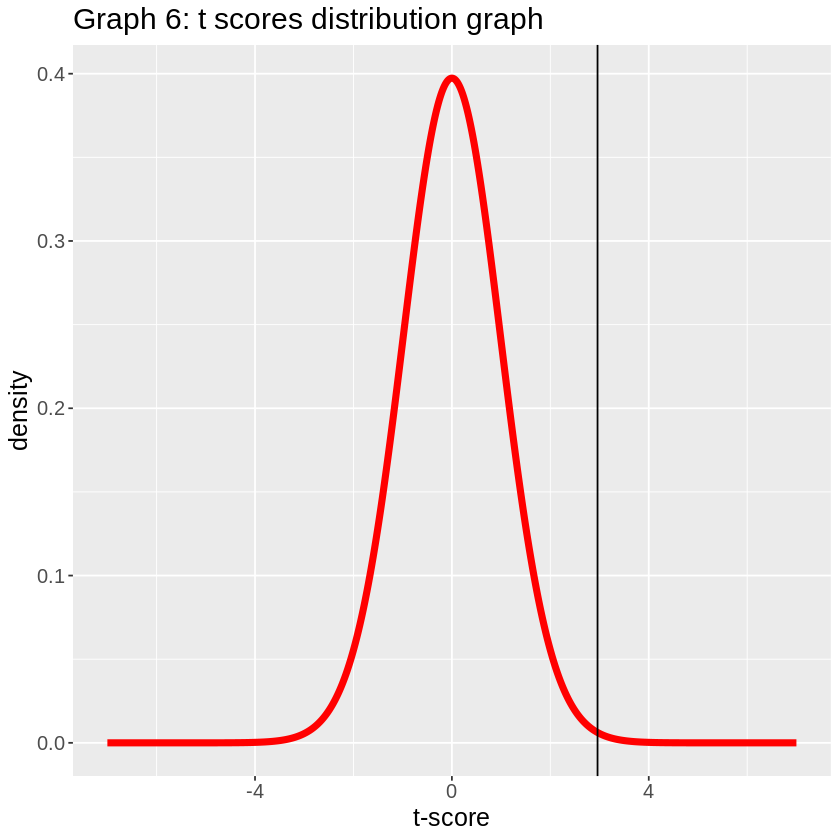

In [10]:
#the bootstrap distribtuion graph vs t-test graph
sampling_dist_sample_mean_z <- 
    ggplot() +
    geom_line(data = tibble(x = seq(-7, 7, 0.01), 
                            density = dt(x, df = v)), 
              aes(x = x, y = density), color = "red", lwd = 2) + 
    xlab("t-score") +
  theme(text = element_text(size = 15))+
    ggtitle("Graph 6: t scores distribution graph")+
    geom_vline(xintercept = t_value)
sampling_dist_sample_mean_z

In [11]:
#summary of stats recieved
summary<- tibble(
  type = c("bootrapping","CLT/t-value"), 
  lower_ci = c(percentile_ci$lower_ci, diff_mean_ci_t$lower_ci),
  upper_ci= c(percentile_ci$upper_ci, diff_mean_ci_t$upper_ci),
  p_value = c(as.numeric(p_value_permute), p_value),
  se = c(se_bootstrap, se)
)
print('Tibble 12')
summary

[1] "Tibble 12"


type,lower_ci,upper_ci,p_value,se
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
bootrapping,1.458018,7.382629,0.001500000,1.487762
CLT/t-value,1.432323,7.397677,0.002185338,1.491939


## Results

We obtained an observed mean difference of 4.415%, meaning that from our sample, we found that private school students have on average 4.42% higher English 12 marks than their public school counterparts. Using bootstrapping, we determined the p-value of this mean difference to be 0.0015, with a 95% confidence interval of 1.46 and	7.38. This means there is a 95% chance that the true difference in averages is between 1.46% and 7.38%. For the t-test, we first manually calculated the test statistic and obtained a value of 2.96. With this, we found a p-value of 0.0022. As shown in graph 4, the observed value is far to the right of the null model, indicating that we are very unlikely to obtain this value if the null hypothesis were true. Using the t.test() function in R, we obtained the same result indicating that our method of conducting the t-test was correct. Using the t-test, we found a 95% confidence interval of 1.43 and 7.40. This means there is a 95% chance that the true difference in averages between the two school types is between 1.43% and 7.40%. At a significance level of 0.05, we reject the null hypothesis using both bootstrap and t-test and conclude that private school students do have higher English 12 final marks than public school students. 

Bootstrapping and asymptotics (t-test) produced similar results, although the t-test produced a slightly wider confidence interval. In our case, either bootstrapping or asymptotics would be appropriate for this analysis. However, we believe that asymptotics is more trustworthy in this instance because we obtained a p-value of 0.0015 with bootstrapping 10000 times, which allows us to only be able to conclude that our p-value is < 0.0015, while the p-value obtained from the asymptotic test gave us a specific value of 0.002185338. Since our computing resources are limited, we don't want to take very large reps for our bootstrap distribution to get our p-value. 


## Discussion

We found that the difference in English 12 final grades between public and private high schools to be significant. Specifically, the scores of private high schools were higher by an average of about 7%. After analyzing our data using two different methods we found our p-value to be less than 0.001 in both cases. So, we can confidently say that our conclusions are replicable and are very incompatible with our null hypothesis (H0: no difference is observed between the school types). Therefore, it is appropriate to generalize the results found in this report to private and public high schools all over BC. 

In accordance with our preliminary results, we expected to find that mean final English 12 grades to be higher in BC independent schools rather than public. Which coincides with the results found. 

This analysis suggests that there is/are some factor(s) that result in private high schools having a higher average English 12 final grade than public schools. Therefore, these findings could potentially impact the decisions parents make regarding their children’s education. It could also influence the amount of government funding that public schools receive. Since the choice (between sending children to a public or private high school) is a luxury that not everyone has, perhaps more government funding for public schools can somewhat balance the incoming revenue disparity between the two school types. This leads to the question of whether the socio-economic status of a family directly affects the child’s performance in school. Although, there may be other hidden variables that also affect their performance, such as peers, attendance, or the quality of teaching received. Future studies could delve deeper into the circumstances of students to gain a more complete picture of what factors ultimately lead to a higher final grade in English 12. 


## Reference

1. Analysis and Reporting Unit, Ministry of Education. (2020). BC schools grade 10, 11, 12 examinations results 2016/2017 to 2019/2020. British Columbia. 
2.  Chen, G. (2019, April 5). Public School vs. Private School. Public School Review. https://www.publicschoolreview.com/blog/public-school-vs-private-school#:%7E:text=Private%20school%20students%20generally%20perform,counterparts%20on%20standardized%20achievement%20tests.&text=Their%20average%20scores%20were%20above,science%20and%20mathematics%20proficiency%20tests.
3. Hernández-Gálvez, D. C., & Roldán-Valadez, E. (2019). Mexican ENARM: performance comparison of public vs. private medical schools, geographic and socioeconomic regions. Salud Pública de México, 61(5, sep-oct), 637. https://doi.org/10.21149/10078
4. Ma, Y., Hou, X., Huang, J., Wang, W., Li, Y., Zhou, X., & Du, X. (2018). Educational inequality and achievement disparity: An empirical study of migrant children in China. Children and Youth Services Review, 87, 145–153. https://doi.org/10.1016/j.childyouth.2018.02.026
5. UNESCO Institute for Statistics. (2020, September). Government expenditure on education, total (% of government expenditure) [Total general (local, regional and central) government expenditure on education (current, capital, and transfers), expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government.]. The World Bank. https://data.worldbank.org/indicator/SE.XPD.TOTL.GB.ZS
